In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as pltc
import datetime as dt
from scipy import stats
from sklearn import preprocessing
import matplotlib as mpl
from scipy.stats import skew

## Plotting parameters
mpl.rcParams['pdf.fonttype'] = 42

## Cubic feet to cubic meters conversion factor
cfs_2_cms = 0.0283168466

In [2]:
i = 2
pnwNP = pd.read_csv("../data/pnwNP_StatsLocations_SS.csv")
df = pd.read_csv('../data/pnwNP_modeledData/'+str(pnwNP['gage'][i])+".csv")
df['time'] = pd.to_datetime(df['time'])
df['water_year'] = df.time.dt.year.where(df.time.dt.month < 10, df.time.dt.year + 1)
df

,Unnamed: 0,streamflow_VIC,time,streamflow_PRMS,streamflow_NWM2d0,streamflow_NWM2d1,streamflow_NWIS,gage,water_year
0,0,0.767205,1950-01-01,12.308974,NaN,NaN,0.045307,10378500,1950
1,1,1.181407,1950-01-02,17.368828,NaN,NaN,0.042475,10378500,1950
2,2,1.245326,1950-01-03,15.873023,NaN,NaN,0.042475,10378500,1950
3,3,1.250622,1950-01-04,13.633054,NaN,NaN,0.045307,10378500,1950
4,4,1.247074,1950-01-05,11.714673,NaN,NaN,0.048139,10378500,1950
...,...,...,...,...,...,...,...,...,...
25928,25928,NaN,2020-12-27,NaN,NaN,0.720000,NaN,10378500,2021
25929,25929,NaN,2020-12-28,NaN,NaN,0.718333,NaN,10378500,2021
25930,25930,NaN,2020-12-29,NaN,NaN,0.710000,NaN,10378500,2021
25931,25931,NaN,2020-12-30,NaN,NaN,0.710000,NaN,10378500,2021


In [9]:
pnwNP[pnwNP["numZero"]>100]

,Unnamed: 0,gage,dec_lat,dec_long,numZero,numOne,startDate,endDate,comid,numObs,propZero,propOne,minProb_SS,maxProb_SS,meanProb_SS,countProb_SS,medianProb_SS
0,0,10361700,41.722116,-119.373258,2797,3228,1963-10-02,1972-09-29,24061841.0,3285,0.851446,0.982648,0.112000,0.112769,0.112128,6,0.112000
3,3,10387500,42.999869,-120.751093,8177,8544,1951-06-19,1991-09-29,NaN,14712,0.555805,0.580750,0.074308,0.096923,0.085831,10,0.086308
4,4,10389500,43.110973,-121.069165,3131,4183,1965-10-02,1991-09-29,24026288.0,9493,0.329822,0.440640,0.043231,0.590615,0.434198,7,0.590615
8,8,10395000,43.426361,-118.802194,933,1047,1972-03-02,1977-09-29,24008592.0,2037,0.458027,0.513991,0.184769,0.184769,0.184769,6,0.184769
9,9,10395500,43.383208,-118.834373,1412,1473,1972-03-02,1977-09-29,24006954.0,2037,0.693176,0.723122,NaN,NaN,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,595,14324580,43.379834,-124.242058,3081,7600,1975-07-02,2008-09-29,23910511.0,12143,0.253726,0.625875,0.513077,0.600615,0.579846,5,0.593385
602,602,14340400,42.263746,-122.449748,432,784,1960-10-02,1965-09-29,23923124.0,1823,0.236972,0.430060,NaN,NaN,NaN,0,NaN
605,605,14349500,42.163745,-122.603918,1928,1940,1975-10-02,1986-09-29,23932188.0,4015,0.480199,0.483188,0.461077,0.497538,0.481983,9,0.495077
606,606,14350000,42.163745,-122.605307,1022,5448,1950-02-01,1986-09-29,23930906.0,13389,0.076331,0.406901,0.400769,0.594923,0.533091,11,0.592923


In [94]:
pnwNPss = pd.read_csv("../data/StreamStats_GageStats/"+str(pnwNP['gage'][i])+".csv")
pnwNPss['value'] = pnwNPss['value'] * cfs_2_cms
pnwNPss.head()
# pnwNPss

,value,statName,statCode,statDesc,statisticErrors,yearsofRecord,comments
0,0.068527,7 Day 2 Year Low Flow,M7D2Y,7-Day mean low-flow that occurs on average onc...,[],46.0,NaN
1,0.023814,7 Day 10 Year Low Flow,M7D10Y,7-Day mean low-flow that occurs on average onc...,[],46.0,NaN
2,8.778222,1 Percent Duration,D1,Streamflow exceeded 1 percent of the time,[],46.0,Statistic Date Range 10/1/1910 - 9/30/1991
3,6.654459,2 Percent Duration,D2,Streamflow exceeded 2 percent of the time,[],46.0,Statistic Date Range 10/1/1910 - 9/30/1991
4,5.663369,3 Percent Duration,D3,Streamflow exceeded 3 percent of the time,[],46.0,Statistic Date Range 10/1/1910 - 9/30/1991


In [91]:
# df['7Q10'] = df['streamflow_NWM2d0'].rolling(window=7).mean()
# df['7Q10'] = df['streamflow_NWIS'].rolling(window=7).mean()
# df['7Q10'] = df['streamflow_NWM2d1'].rolling(window=7).mean()

df

,Unnamed: 0,streamflow_VIC,time,streamflow_PRMS,streamflow_NWM2d0,streamflow_NWM2d1,streamflow_NWIS,gage,water_year,7Q10,test_nwis
0,0,0.767205,1950-01-01,12.308974,NaN,NaN,0.045307,10378500,1950,NaN,NaN
1,1,1.181407,1950-01-02,17.368828,NaN,NaN,0.042475,10378500,1950,NaN,NaN
2,2,1.245326,1950-01-03,15.873023,NaN,NaN,0.042475,10378500,1950,NaN,NaN
3,3,1.250622,1950-01-04,13.633054,NaN,NaN,0.045307,10378500,1950,NaN,NaN
4,4,1.247074,1950-01-05,11.714673,NaN,NaN,0.048139,10378500,1950,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
25928,25928,NaN,2020-12-27,NaN,NaN,0.720000,NaN,10378500,2021,NaN,NaN
25929,25929,NaN,2020-12-28,NaN,NaN,0.718333,NaN,10378500,2021,NaN,NaN
25930,25930,NaN,2020-12-29,NaN,NaN,0.710000,NaN,10378500,2021,NaN,NaN
25931,25931,NaN,2020-12-30,NaN,NaN,0.710000,NaN,10378500,2021,NaN,NaN


In [84]:
lf7q10 = df[['water_year','7Q10']]
lf7q10 = lf7q10.groupby(['water_year']).min()
# lf7q10
# lf7q10 = lf7q10.drop(['time','streamflow_NWM2d0'],axis=1)
lf7q10 = lf7q10[df['7Q10'].isnull().groupby(df['water_year']).sum() <= 36.6] ## makes sure that gage has at least 90% of year with data
# lf7q10 = lf7q10[lf7q10['7Q10']>0]
len(lf7q10)

42

In [72]:
lf7q10["RI"] = (1+len(lf7q10))/lf7q10['7Q10'].rank(method = "min")
lf7q10["ExcProb"] = 1/lf7q10["RI"]

In [73]:
lf7q10

,7Q10,RI,ExcProb
water_year,,,
1950,0.005663,3.307692,0.302326
1951,0.003641,14.333333,0.069767
1952,0.008091,1.869565,0.534884
1953,0.022653,1.131579,0.883721
1954,0.016181,1.303030,0.767442
1955,0.005663,3.307692,0.302326
1956,0.005259,8.600000,0.116279
1957,0.014158,1.343750,0.744186
1958,0.023867,1.075000,0.930233


In [118]:
#Measures of the distribution
Xbar = np.mean(np.log10(lf7q10['7Q10']))
S = np.std(np.log10(lf7q10['7Q10']))
g = skew(np.log10(lf7q10['7Q10']))
 
# #calculate z, K, to plot the fitted Pearson Type III
# QyearlyMins <- QyearlyMins %>% 
#   mutate(z = 4.91 * ((1 / ReturnInterval) ^ 0.14 - (1 - 1 / ReturnInterval) ^ 0.14)) %>%
#   mutate(K = (2 / g) * (((1 + (g * z) / 6 - (g ^ 2) / 36) ^ 3) - 1) ) %>%
#   mutate(Qfit = 10^(Xbar + (K * S)))

lf7q10["z"] = 4.91 * ((1 / lf7q10["RI"])**0.14 -(1 - 1 / lf7q10["RI"])**0.14)
lf7q10["K"] = (2/g) * ((((lf7q10["z"] - (g/6))*(g/6)+1)**3)-1)
# lf7q10["K"] = (2/g) * (((1 + (g/lf7q10["z"])/6-(g**2)/36)**3) - 1)
lf7q10["Qfit"] = 10**(Xbar + (lf7q10["K"] * S))

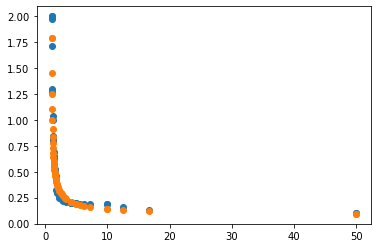

In [119]:
plt.scatter(lf7q10["RI"],lf7q10['7Q10'])
plt.scatter(lf7q10["RI"],lf7q10['Qfit'])

In [120]:
RetIntCalc = 2
z = 4.91 * ((1 / RetIntCalc)**0.14 -(1 - 1 / RetIntCalc)**0.14)
K = (2/g) * ((((z - (g/6))*(g/6)+1)**3)-1)
# K = (2/g) * ((((1 + (g/z))/6-((g**2)/36))**3) - 1)
# PearsonQY= np.exp(Xbar + (K * S))
(10**(Xbar + (K * S)))

0.354851568255363

In [116]:
import dataretrieval as nwis

startDate = "1910-09-30"
endDate = "2020-12-31"

tt = nwis.get_dv(sites=str(pnwNP['gage'][i]),
                 start = startDate,
                 end = endDate)[0]

In [117]:
tt['time'] = tt.index
tt = tt[["00060_Mean","time"]]
tt['water_year'] = tt.time.dt.year.where(tt.time.dt.month < 10, tt.time.dt.year + 1)
tt['7Q10'] = tt['00060_Mean'].rolling(window=7).mean()
tt = tt.groupby(['water_year']).min()
tt["RI"] = (1+len(tt))/tt['7Q10'].rank(method = "min")
tt["ExcProb"] = 1/tt["RI"]
lf7q10 = tt